In [1]:
import os
import time
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.cluster import Birch
from sklearn import preprocessing
import glob


In [3]:
def rt_invocations(faults_name):
    # retrieve the response time of each invocation from data collection
    # input: prefix of the csv file
    # output: round-trip time
    
    latency_filename = faults_name + '_latency_source_90.csv'  # inbound
    latency_df_source = pd.read_csv(latency_filename) 
    latency_df_source['unknown_front-end'] = 0
    
    latency_filename = faults_name + '_latency_source_90.csv' # outbound
    latency_df_destination = pd.read_csv(latency_filename) 
    
    latency_df = latency_df_destination.add(latency_df_source)    

    return latency_df

In [4]:
def birch_ad_with_smoothing(latency_df, threshold):
    # anomaly detection on response time of service invocation. 
    # input: response times of service invocations, threshold for birch clustering
    # output: anomalous service invocation
    smoothing_window = 12
    anomalies = []
    #print('latency_df: ', latency_df)
    for svc, latency in latency_df.iteritems():
        # No anomaly detection in db
        if svc != 'timestamp' and 'Unnamed' not in svc and 'rabbitmq' not in svc and 'db' not in svc:
        # Dataframe Iterators gives data of each columns
            #print(latency)
            # Getting Rolling Mean
            latency = latency.rolling(window=smoothing_window, min_periods=1).mean()

            
            x = np.array(latency) # Converting into numpy array
            x = np.where(np.isnan(x), 0, x) # Changing Fields with NaN Values into 0
            print('x', x)
            normalized_x = preprocessing.normalize([x]) #

            X = normalized_x.reshape(-1,1)

#            threshold = 0.05

            brc = Birch(branching_factor=50, n_clusters=None, threshold=threshold, compute_labels=True)
            brc.fit(X)
            brc.predict(X)

            labels = brc.labels_
#            centroids = brc.subcluster_centers_
            n_clusters = np.unique(labels).size
            if n_clusters > 1:
                anomalies.append(svc)
    return anomalies

In [5]:
alpha = 0.55
ad_threshold = 0.045


# folders = ['1', '2', '3', '4', '5']
folders = ['1']
# faults_type = ['svc_latency', 'service_cpu', 'service_memory'] #, 'service_memory', 'svc_latency'
faults_type = ['service_cpu']
# targets = ['front-end', 'catalogue', 'orders', 'user', 'carts', 'payment', 'shipping']
targets = ['carts']

In [6]:
for folder in folders:
    for fault_type in faults_type:
        for target in targets:
            if target == 'front-end' and fault_type != 'svc_latency':
                #'skip front-end for service_cpu and service_memory'
                continue 
            print('target:', target, ' fault_type:', fault_type)
            
            # prefix of csv files 
            # faults_name = '../faults/' + folder + '/' + fault_type + '_' + target
            faults_name = './data/' + fault_type + '_' + target

            latency_df = rt_invocations(faults_name)
            
            if (target == 'payment' or target  == 'shipping') and fault_type != 'svc_latency':
                threshold = 0.02
            else:
                threshold = ad_threshold   
            
            # anomaly detection on response time of service invocation
            anomalies = birch_ad_with_smoothing(latency_df, threshold)
            print(anomalies)

target: carts  fault_type: service_cpu
x [ 81.39344262  75.55783242  66.75562812  62.38829367  64.9541132
  65.43524585  64.98345748 109.56365029 141.43753042 164.04658637
 167.50535336 178.15441705 203.28339487 228.13987635 251.30435806
 276.26109414 303.41745736 335.85571494 369.42914151 343.18261373
 317.72311896 291.86701997 278.9344381  260.91835526 233.14859354
 209.29519848 191.50144848 170.74718063 141.42924155 110.23317928
  77.29728184]
x [ 64.02777778  58.48128019  55.74808351  53.15408589  51.94216635
  51.41402751  56.57956866  60.341944    70.50085599  68.48850624
  68.6566273   67.06294732  65.51564725  68.75674512  70.22474821
  71.8060593   77.9193974   87.4913166   86.69286972  87.56056452
  79.16039764  80.13029518  81.49276703  92.58728362  99.17393554
  99.33267885 100.49271673 100.25860302  94.10045908  87.16548433
  87.91338759]
x [196.875      171.51442308 248.41702279 263.50026709 250.80021368
 241.96892806 238.97336691 269.39581369 288.99013227 305.76325019
 3

In [7]:
latency = latency_df[['front-end_carts']]
latency_mean = latency.rolling(window=12, min_periods=1).mean()
x = latency_mean.to_numpy()
x = np.where(np.isnan(x), 0, x) # Changing Fields with NaN Values into 0
x = x.flatten()
normalized_x = preprocessing.normalize([x]) #
X = normalized_x.reshape(-1,1)


In [8]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=threshold, compute_labels=True)
brc.fit(X)
brc.predict(X)

labels = brc.labels_

In [9]:
n_clusters = np.unique(labels).size
n_clusters

2

In [11]:
os.getcwd()

'd:\\THU Studies\\Advance Network Management\\Project\\MicroRCA'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

path = os.path.dirname(os.getcwd())

data = pd.read_csv(path + '\\training_data\\2020_05_04\\esb.csv')


In [3]:
data['date'] = pd.to_datetime(data.startTime, unit='ms')

In [4]:
data

,serviceName,startTime,avg_time,num,succee_num,succee_rate,date
0,osb_001,1588521600000,0.5691,347,347,1.0,2020-05-03 16:00:00
1,osb_001,1588521660000,0.5813,354,354,1.0,2020-05-03 16:01:00
2,osb_001,1588521720000,0.5397,363,363,1.0,2020-05-03 16:02:00
3,osb_001,1588521780000,0.6190,387,387,1.0,2020-05-03 16:03:00
4,osb_001,1588521840000,0.4909,387,387,1.0,2020-05-03 16:04:00
...,...,...,...,...,...,...,...
1434,osb_001,1588607700000,0.6240,600,600,1.0,2020-05-04 15:55:00
1435,osb_001,1588607760000,0.5897,643,643,1.0,2020-05-04 15:56:00
1436,osb_001,1588607820000,0.6495,619,619,1.0,2020-05-04 15:57:00
1437,osb_001,1588607880000,0.6262,614,614,1.0,2020-05-04 15:58:00


In [5]:
df = data.set_index(pd.DatetimeIndex(data['date']))
df = df[['num','avg_time']]
df = df.dropna()

In [13]:
df = df.diff()

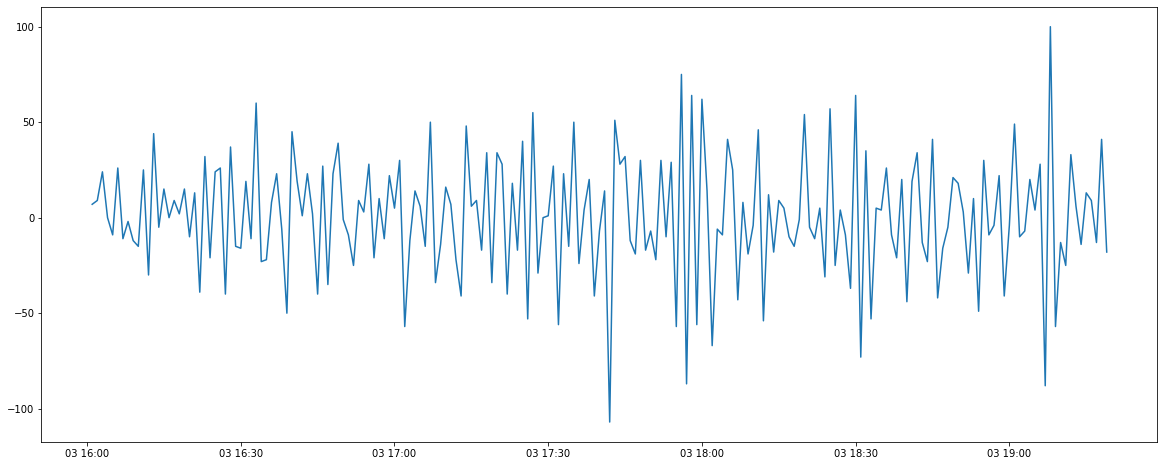

In [14]:
plt.figure (figsize=(20,8))
plt.plot(df.index[:200],df.num[:200])
plt.show()

0.05003474635163308


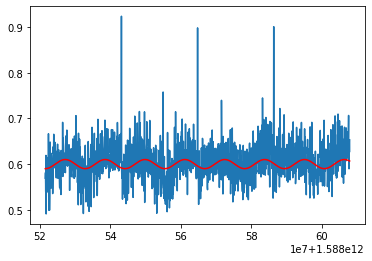

In [8]:
k = np.percentile(data['avg_time'], 95)
data['anomaly'] = data.avg_time>k
print(sum(data.anomaly)/len(data.anomaly))
plt.plot(data.startTime,data.avg_time)
x = np.arange(8)*185
# plt.vlines(data.startTime[x], 0.4, 1)
plt.plot(data.startTime,-0.01*np.cos((data.startTime-data.startTime[0])/(data.startTime[185//6]-data.startTime[0]))+0.6, color = 'r')
plt.show()

In [9]:
data['avg_time']

0       0.5691
1       0.5813
2       0.5397
3       0.6190
4       0.4909
         ...  
1434    0.6240
1435    0.5897
1436    0.6495
1437    0.6262
1438    0.6530
Name: avg_time, Length: 1439, dtype: float64

In [10]:
k = np.percentile(data['avg_time'], 99)
data[data['avg_time']>k]

,serviceName,startTime,avg_time,num,succee_num,succee_rate,date,anomaly
145,osb_001,1588530300000,0.7061,538,538,1.0,2020-05-03 18:25:00,True
360,osb_001,1588543200000,0.9237,635,635,1.0,2020-05-03 22:00:00,True
445,osb_001,1588548300000,0.7151,506,506,1.0,2020-05-03 23:25:00,True
469,osb_001,1588549740000,0.7144,534,534,1.0,2020-05-03 23:49:00,True
557,osb_001,1588555020000,0.7578,416,416,1.0,2020-05-04 01:17:00,True
616,osb_001,1588558560000,0.7146,463,463,1.0,2020-05-04 02:16:00,True
720,osb_001,1588564800000,0.8982,632,632,1.0,2020-05-04 04:00:00,True
833,osb_001,1588571580000,0.7396,588,588,1.0,2020-05-04 05:53:00,True
1027,osb_001,1588583220000,0.7448,573,573,1.0,2020-05-04 09:07:00,True
1080,osb_001,1588586400000,0.9009,605,605,1.0,2020-05-04 10:00:00,True


In [11]:
print(data[data['avg_time']>k].index)

Int64Index([ 145,  360,  445,  469,  557,  616,  720,  833, 1027, 1080, 1109,
            1129, 1369, 1383, 1433],
           dtype='int64')


In [12]:
data[350:370]

,serviceName,startTime,avg_time,num,succee_num,succee_rate,date,anomaly
350,osb_001,1588542600000,0.5875,620,620,1.0,2020-05-03 21:50:00,False
351,osb_001,1588542660000,0.6642,630,630,1.0,2020-05-03 21:51:00,False
352,osb_001,1588542720000,0.6357,626,626,1.0,2020-05-03 21:52:00,False
353,osb_001,1588542780000,0.6363,643,643,1.0,2020-05-03 21:53:00,False
354,osb_001,1588542840000,0.6032,633,633,1.0,2020-05-03 21:54:00,False
355,osb_001,1588542900000,0.6386,649,649,1.0,2020-05-03 21:55:00,False
356,osb_001,1588542960000,0.6222,594,594,1.0,2020-05-03 21:56:00,False
357,osb_001,1588543020000,0.6333,613,613,1.0,2020-05-03 21:57:00,False
358,osb_001,1588543080000,0.6669,653,653,1.0,2020-05-03 21:58:00,False
359,osb_001,1588543140000,0.6237,648,648,1.0,2020-05-03 21:59:00,False
